## Group Week 3 Asssignment - Foreign-Born Populations in a Half-Mile Radius of the Metro L Line Highland Park Station

### Relevant modules

We first have to import specific modules that will allow us to visualize, analyze our data.

In [9]:
import pandas as pd

import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Now we can load our data

In [10]:
yoe = gpd.read_file('acs2019_5yr_B05015_14000US06037222001.geojson')

### Exploring Our Data

Now that our data is uploaded, let's run a quick query to understand what information is at our fingertips.

In [11]:
yoe.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B05015001         2347 non-null   float64 
 3   B05015001, Error  2347 non-null   float64 
 4   B05015002         2347 non-null   float64 
 5   B05015002, Error  2347 non-null   float64 
 6   B05015003         2347 non-null   float64 
 7   B05015003, Error  2347 non-null   float64 
 8   B05015004         2347 non-null   float64 
 9   B05015004, Error  2347 non-null   float64 
 10  B05015005         2347 non-null   float64 
 11  B05015005, Error  2347 non-null   float64 
 12  B05015006         2347 non-null   float64 
 13  B05015006, Error  2347 non-null   float64 
 14  B05015007         2347 non-null   float64 
 15  B05015007, Error  2347 non-null   float64 
 16  B05015008       

We have a geoid and geometry datatype which will be useful for mapping later.

In [12]:
yoe.head()

,geoid,name,B05015001,"B05015001, Error",B05015002,"B05015002, Error",B05015003,"B05015003, Error",B05015004,"B05015004, Error",...,"B05015027, Error",B05015028,"B05015028, Error",B05015029,"B05015029, Error",B05015030,"B05015030, Error",B05015031,"B05015031, Error",geometry
0,05000US06037,"Los Angeles County, CA",3430507.0,14119.0,288054.0,4584.0,76162.0,2634.0,211892.0,3307.0,...,1076.0,87568.0,2277.0,989775.0,8062.0,173834.0,3797.0,815941.0,6993.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,326.0,13.0,25.0,0.0,12.0,13.0,25.0,...,12.0,0.0,12.0,910.0,256.0,130.0,79.0,780.0,249.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",810.0,180.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,690.0,149.0,36.0,36.0,654.0,140.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3167.0,438.0,0.0,17.0,0.0,17.0,0.0,17.0,...,17.0,0.0,17.0,2054.0,299.0,198.0,182.0,1856.0,279.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1749.0,251.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,1120.0,252.0,147.0,118.0,973.0,226.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [7]:
yoe.tail()

,geoid,name,B05015001,"B05015001, Error",B05015002,"B05015002, Error",B05015003,"B05015003, Error",B05015004,"B05015004, Error",...,"B05015027, Error",B05015028,"B05015028, Error",B05015029,"B05015029, Error",B05015030,"B05015030, Error",B05015031,"B05015031, Error",geometry
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",146.0,71.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,37.0,23.0,0.0,12.0,37.0,23.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2346,14000US06037990300,"Census Tract 9903, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.47656 33.75038, -118.4661..."


In [9]:
yoe.shape

(2347, 65)

We have 2347 census tracts! But we're only concerned with those that are within a half-mile of the Highland Park Station. Plus one of these is the entire LA County. 

<AxesSubplot:>

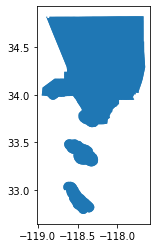

In [13]:
yoe.plot()

There's LA County! Now let's isolate the census tracts we've already identified through Google Earth to be within a half-mile of the station. 

### Trimming Our Data

In [14]:
keep_rows = yoe[yoe["geoid"].isin(['14000US06037183610',
 '14000US06037183510',
 '14000US06037183520',
 '14000US06037183810',
 '14000US06037183820',
 '14000US06037183701',
 '14000US06037183702',
 '14000US06037183101',
 '14000US06037183620'])]

Let's run a query to see if all nine made it over. 

In [15]:
keep_rows.shape

(9, 65)

There they are! Let's take a look at them in more detail.

In [16]:
keep_rows.head()

,geoid,name,B05015001,"B05015001, Error",B05015002,"B05015002, Error",B05015003,"B05015003, Error",B05015004,"B05015004, Error",...,"B05015027, Error",B05015028,"B05015028, Error",B05015029,"B05015029, Error",B05015030,"B05015030, Error",B05015031,"B05015031, Error",geometry
359,14000US06037183101,"Census Tract 1831.01, Los Angeles, CA",1086.0,208.0,47.0,46.0,0.0,12.0,47.0,46.0,...,12.0,9.0,17.0,129.0,64.0,51.0,45.0,78.0,42.0,"MULTIPOLYGON (((-118.18743 34.12817, -118.1855..."
368,14000US06037183510,"Census Tract 1835.10, Los Angeles, CA",750.0,159.0,10.0,13.0,0.0,12.0,10.0,13.0,...,12.0,10.0,13.0,141.0,58.0,42.0,28.0,99.0,43.0,"MULTIPOLYGON (((-118.20800 34.11272, -118.2080..."
369,14000US06037183520,"Census Tract 1835.20, Los Angeles, CA",1311.0,244.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,11.0,18.0,63.0,50.0,14.0,21.0,49.0,35.0,"MULTIPOLYGON (((-118.20733 34.11181, -118.2062..."
370,14000US06037183610,"Census Tract 1836.10, Los Angeles, CA",1231.0,191.0,27.0,26.0,7.0,10.0,20.0,25.0,...,12.0,20.0,23.0,157.0,64.0,21.0,17.0,136.0,60.0,"MULTIPOLYGON (((-118.19796 34.11446, -118.1977..."
371,14000US06037183620,"Census Tract 1836.20, Los Angeles, CA",1185.0,227.0,13.0,20.0,0.0,12.0,13.0,20.0,...,12.0,26.0,36.0,47.0,25.0,10.0,11.0,37.0,23.0,"MULTIPOLYGON (((-118.19448 34.11592, -118.1942..."


In [17]:
keep_rows.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9 entries, 359 to 375
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             9 non-null      object  
 1   name              9 non-null      object  
 2   B05015001         9 non-null      float64 
 3   B05015001, Error  9 non-null      float64 
 4   B05015002         9 non-null      float64 
 5   B05015002, Error  9 non-null      float64 
 6   B05015003         9 non-null      float64 
 7   B05015003, Error  9 non-null      float64 
 8   B05015004         9 non-null      float64 
 9   B05015004, Error  9 non-null      float64 
 10  B05015005         9 non-null      float64 
 11  B05015005, Error  9 non-null      float64 
 12  B05015006         9 non-null      float64 
 13  B05015006, Error  9 non-null      float64 
 14  B05015007         9 non-null      float64 
 15  B05015007, Error  9 non-null      float64 
 16  B05015008         

We currently have lots of columns with "Error" in it. This column represents the margin of error of the column above it. We don't need it for our purposes so let's scrub these. 

In [18]:
columns_to_keep = ['geoid',
'name',
'B05015001',
'B05015002',
'B05015003',
'B05015004',
'B05015005',
'B05015006',
'B05015007',
'B05015008',
'B05015009', 
'B05015010',  
'B05015011',
'B05015012',
'B05015013',
'B05015014',
'B05015015',
'B05015016',
'B05015017',
'B05015018',
'B05015019',
'B05015020',
'B05015021',
'B05015022',
'B05015023',
'B05015024',
'B05015025',
'B05015026',
'B05015027',
'B05015028',
'B05015029',
'B05015030',
'B05015031',
 'geometry']

In [19]:
keep_rows[columns_to_keep]

,geoid,name,B05015001,B05015002,B05015003,B05015004,B05015005,B05015006,B05015007,B05015008,...,B05015023,B05015024,B05015025,B05015026,B05015027,B05015028,B05015029,B05015030,B05015031,geometry
359,14000US06037183101,"Census Tract 1831.01, Los Angeles, CA",1086.0,47.0,0.0,47.0,68.0,0.0,68.0,0.0,...,116.0,0.0,116.0,9.0,0.0,9.0,129.0,51.0,78.0,"MULTIPOLYGON (((-118.18743 34.12817, -118.1855..."
368,14000US06037183510,"Census Tract 1835.10, Los Angeles, CA",750.0,10.0,0.0,10.0,13.0,0.0,13.0,0.0,...,94.0,18.0,76.0,10.0,0.0,10.0,141.0,42.0,99.0,"MULTIPOLYGON (((-118.20800 34.11272, -118.2080..."
369,14000US06037183520,"Census Tract 1835.20, Los Angeles, CA",1311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,40.0,11.0,0.0,11.0,63.0,14.0,49.0,"MULTIPOLYGON (((-118.20733 34.11181, -118.2062..."
370,14000US06037183610,"Census Tract 1836.10, Los Angeles, CA",1231.0,27.0,7.0,20.0,13.0,0.0,13.0,0.0,...,131.0,0.0,131.0,20.0,0.0,20.0,157.0,21.0,136.0,"MULTIPOLYGON (((-118.19796 34.11446, -118.1977..."
371,14000US06037183620,"Census Tract 1836.20, Los Angeles, CA",1185.0,13.0,0.0,13.0,0.0,0.0,0.0,0.0,...,173.0,0.0,173.0,26.0,0.0,26.0,47.0,10.0,37.0,"MULTIPOLYGON (((-118.19448 34.11592, -118.1942..."
372,14000US06037183701,"Census Tract 1837.01, Los Angeles, CA",988.0,5.0,0.0,5.0,30.0,0.0,30.0,0.0,...,107.0,21.0,86.0,39.0,0.0,39.0,71.0,5.0,66.0,"MULTIPOLYGON (((-118.19266 34.10966, -118.1920..."
373,14000US06037183702,"Census Tract 1837.02, Los Angeles, CA",767.0,64.0,0.0,64.0,17.0,0.0,17.0,0.0,...,62.0,0.0,62.0,26.0,0.0,26.0,94.0,9.0,85.0,"MULTIPOLYGON (((-118.19121 34.10124, -118.1899..."
374,14000US06037183810,"Census Tract 1838.10, Los Angeles, CA",1680.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,166.0,15.0,151.0,"MULTIPOLYGON (((-118.20374 34.10718, -118.2024..."
375,14000US06037183820,"Census Tract 1838.20, Los Angeles, CA",1565.0,60.0,0.0,60.0,0.0,0.0,0.0,0.0,...,150.0,78.0,72.0,9.0,0.0,9.0,130.0,66.0,64.0,"MULTIPOLYGON (((-118.20290 34.10275, -118.2028..."


We have our trimmed rows and colums. Now let's rename our variable for easier coding.

In [20]:
yoe = keep_rows[columns_to_keep]

In [21]:
yoe.shape

(9, 34)

Awesome! We have our nine census tracts and trimmed rows. But our column titles are still  written in a way that makes it difficult to understand what the data in its columns represents. Referring to the metadata file in the download, we update our column titles accordingly.

In [22]:
list(yoe)

['geoid',
 'name',
 'B05015001',
 'B05015002',
 'B05015003',
 'B05015004',
 'B05015005',
 'B05015006',
 'B05015007',
 'B05015008',
 'B05015009',
 'B05015010',
 'B05015011',
 'B05015012',
 'B05015013',
 'B05015014',
 'B05015015',
 'B05015016',
 'B05015017',
 'B05015018',
 'B05015019',
 'B05015020',
 'B05015021',
 'B05015022',
 'B05015023',
 'B05015024',
 'B05015025',
 'B05015026',
 'B05015027',
 'B05015028',
 'B05015029',
 'B05015030',
 'B05015031',
 'geometry']

In [23]:
yoe.columns = ['geoid',
 'name',
 'Total',
 'China, H.K., Taiwan',
 'China et al Entered 2010 or later',
 'China et al Before 2010',
 'Cuba',
 'Cuba Entered 2010 or later',
 'Cuba Entered Before 2010',
 'Dominican Republic',
 'D.R. Entered 2010 or later',
 'D.R. Entered Before 2010',
 'El Salvador',
 'E.S. Entered 2010 or later',
 'E.S. Entered Before 2010',        
 'Guatemala',
 'Guatemala Entered 2010 or later',
 'Guatemala Entered Before 2010',   
 'India',
 'India Entered 2010 or later',
 'India Entered Before 2010', 
 'Mexico',
 'Mexico Entered 2010 or later',
 'Mexico Entered Before 2010', 
 'Philippines',
 'Philippines Entered 2010 or later',
 'Philippines Entered Before 2010', 
 'Vietnam',
 'Vietnam Entered 2010 or later',
 'Vietnam Entered Before 2010', 
 'All Other Countries',
 'A.O.C. Entered 2010 or later',
 'A.O.C. Entered Before 2010', 
 'geometry']

In [24]:
yoe.head()

,geoid,name,Total,"China, H.K., Taiwan",China et al Entered 2010 or later,China et al Before 2010,Cuba,Cuba Entered 2010 or later,Cuba Entered Before 2010,Dominican Republic,...,Philippines,Philippines Entered 2010 or later,Philippines Entered Before 2010,Vietnam,Vietnam Entered 2010 or later,Vietnam Entered Before 2010,All Other Countries,A.O.C. Entered 2010 or later,A.O.C. Entered Before 2010,geometry
359,14000US06037183101,"Census Tract 1831.01, Los Angeles, CA",1086.0,47.0,0.0,47.0,68.0,0.0,68.0,0.0,...,116.0,0.0,116.0,9.0,0.0,9.0,129.0,51.0,78.0,"MULTIPOLYGON (((-118.18743 34.12817, -118.1855..."
368,14000US06037183510,"Census Tract 1835.10, Los Angeles, CA",750.0,10.0,0.0,10.0,13.0,0.0,13.0,0.0,...,94.0,18.0,76.0,10.0,0.0,10.0,141.0,42.0,99.0,"MULTIPOLYGON (((-118.20800 34.11272, -118.2080..."
369,14000US06037183520,"Census Tract 1835.20, Los Angeles, CA",1311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,40.0,11.0,0.0,11.0,63.0,14.0,49.0,"MULTIPOLYGON (((-118.20733 34.11181, -118.2062..."
370,14000US06037183610,"Census Tract 1836.10, Los Angeles, CA",1231.0,27.0,7.0,20.0,13.0,0.0,13.0,0.0,...,131.0,0.0,131.0,20.0,0.0,20.0,157.0,21.0,136.0,"MULTIPOLYGON (((-118.19796 34.11446, -118.1977..."
371,14000US06037183620,"Census Tract 1836.20, Los Angeles, CA",1185.0,13.0,0.0,13.0,0.0,0.0,0.0,0.0,...,173.0,0.0,173.0,26.0,0.0,26.0,47.0,10.0,37.0,"MULTIPOLYGON (((-118.19448 34.11592, -118.1942..."


Looks great! Let's start getting a sense of the foreign born population around the Highland Park Station, and where they're from. 

### Statistical Analysis of Our Data

In [25]:
yoe['Total']

359    1086.0
368     750.0
369    1311.0
370    1231.0
371    1185.0
372     988.0
373     767.0
374    1680.0
375    1565.0
Name: Total, dtype: float64

Looks like row 374 has the highest foreign born population whereas row 373 has the least. This will be communicated more meaningfully once we map it later. Let's run a query to get a general sense of the foreign born demographics around our station area.  

In [27]:
yoe['Total'].describe()

count       9.000000
mean     1173.666667
std       319.925773
min       750.000000
25%       988.000000
50%      1185.000000
75%      1311.000000
max      1680.000000
Name: Total, dtype: float64

The average foreign population around the Highland Park Station Area is 1,173. That is a lot of people! We don't have available to us how many total people are in each census tract, but if each census tract is holding around the optimum size population of 4,000 - that would mean more than a quarter of residents around the Highland Park Station are foreign born.   

In [28]:
yoe['Total'].sum()

10563.0

In a half-mile radius of the Highland Park Station there are 10,563 foreign born residents. Now is a good time to import a module to help us plot our data and create some better visuals.

In [29]:
import matplotlib.pyplot as plt

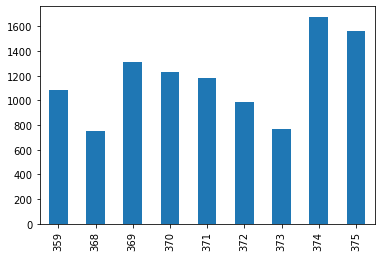

In [30]:
yoe_plot = yoe['Total'].plot(kind='bar')

Just as we've already established, our graph shows that the census tract in row 374 has the higest foreign born population, with 373 having the lowest. Let's add some labels to this bar graph. 

Text(0, 0.5, 'Total')

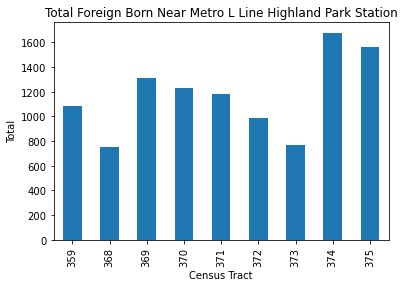

In [ ]:
yoe_plot = yoe['Total'].plot(kind='bar', title="Total Foreign Born Near Metro L Line Highland Park Station")
yoe_plot.set_xlabel("Census Tract")
yoe_plot.set_ylabel("Total")

In [95]:
###Statistical Analysis by Nationality

Let's learn a little more about our foreign-born population, specifically, where they're from. Based on my knowledge of the area, I'm going to run queries for a few Latin American countries and a couple Asian countries to see if one has a more pronounced presence. 

In [32]:
yoe['Mexico'].describe()

count       9.000000
mean      645.222222
std       217.350396
min       331.000000
25%       515.000000
50%       665.000000
75%       669.000000
max      1048.000000
Name: Mexico, dtype: float64

In [33]:
 yoe['Philippines'].describe()

count      9.000000
mean      97.000000
std       54.879413
min        0.000000
25%       62.000000
50%      107.000000
75%      131.000000
max      173.000000
Name: Philippines, dtype: float64

In [34]:
yoe['China, H.K., Taiwan'].describe()

count     9.000000
mean     26.222222
std      24.595618
min       0.000000
25%      10.000000
50%      13.000000
75%      47.000000
max      64.000000
Name: China, H.K., Taiwan, dtype: float64

In [35]:
yoe['El Salvador'].describe()

count      9.000000
mean     197.555556
std      140.072402
min       14.000000
25%      134.000000
50%      172.000000
75%      264.000000
max      489.000000
Name: El Salvador, dtype: float64

In [36]:
yoe['Guatemala'].describe()

count      9.000000
mean      61.000000
std       48.507731
min       15.000000
25%       30.000000
50%       59.000000
75%       62.000000
max      173.000000
Name: Guatemala, dtype: float64

### Mapping Our Data

It appears that based on the countries I analyzed, Mexicans are by far the largest foreign born population near the Highland Park Station, followed by El Salvadorians. Since our group project is focused on all foreign born residents, let's plot a map of the station area with population densities. 

<AxesSubplot:>

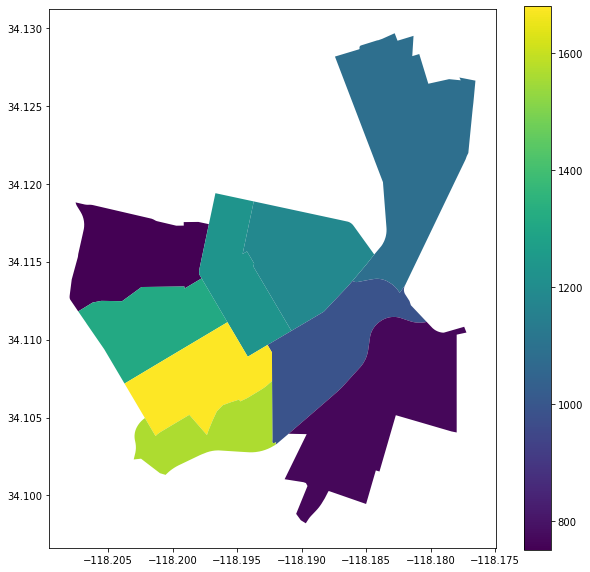

In [37]:
yoe.plot(figsize=(10,10),
                          column='Total',
                          legend=True)

Now that data bar graph is being turned into a stronger visualization. The census tract that we had identified with largest foreign born population is represented on the map as yellow. Based on my knowledge of the area, this census tract is on North Figueroa St between the Highland Park Station and Ave 52. The census tracts with the least foreign born population are also the least residential - they are home to Franklin High School, Arroyo Seco Park, and Ernest E. Debbs Park. As we learned earlier, Mexicans have the highest foreign-born population in the area. But how much of the foriegn born population do they represent? Also, where do other foreign born residents primarily live? Is there a high concentration of Asian residents in a certain census tract? To better understand these relationships, we normalize our data. 

In [38]:
list(yoe)

['geoid',
 'name',
 'Total',
 'China, H.K., Taiwan',
 'China et al Entered 2010 or later',
 'China et al Before 2010',
 'Cuba',
 'Cuba Entered 2010 or later',
 'Cuba Entered Before 2010',
 'Dominican Republic',
 'D.R. Entered 2010 or later',
 'D.R. Entered Before 2010',
 'El Salvador',
 'E.S. Entered 2010 or later',
 'E.S. Entered Before 2010',
 'Guatemala',
 'Guatemala Entered 2010 or later',
 'Guatemala Entered Before 2010',
 'India',
 'India Entered 2010 or later',
 'India Entered Before 2010',
 'Mexico',
 'Mexico Entered 2010 or later',
 'Mexico Entered Before 2010',
 'Philippines',
 'Philippines Entered 2010 or later',
 'Philippines Entered Before 2010',
 'Vietnam',
 'Vietnam Entered 2010 or later',
 'Vietnam Entered Before 2010',
 'All Other Countries',
 'A.O.C. Entered 2010 or later',
 'A.O.C. Entered Before 2010',
 'geometry']

In [39]:
yoe['Percent Mexico'] = yoe['Mexico']/yoe['Total']*100
yoe['Percent China, H.K., Taiwan'] = yoe['China, H.K., Taiwan']/yoe['Total']*100
yoe['Percent Philippines'] = yoe['Philippines']/yoe['Total']*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [40]:
yoe['Percent Mexico']

359    47.421731
368    44.133333
369    66.590389
370    54.021121
371    56.455696
372    61.639676
373    56.323338
374    62.380952
375    42.492013
Name: Percent Mexico, dtype: float64

All the census tracts around a half-mile of the Highland Park Station have foreign born Mexican populations above 42%, with the highest being 66%

In [41]:
yoe['Percent China, H.K., Taiwan']

359    4.327808
368    1.333333
369    0.000000
370    2.193339
371    1.097046
372    0.506073
373    8.344198
374    0.595238
375    3.833866
Name: Percent China, H.K., Taiwan, dtype: float64

There is one census tract around a half-mile of the Highland Park Station that has zero foreign born residents from China, Hong Kong or Taiwan.

In [42]:
yoe['Percent Philippines']

359    10.681400
368    12.533333
369     3.051106
370    10.641755
371    14.599156
372    10.829960
373     8.083442
374     0.000000
375     9.584665
Name: Percent Philippines, dtype: float64

Census tracts around a half-mile of the Highland Park Station have foreign born Filipino populations that range from 0%-15%. 

Let's project some of this data onto a map. To do so, we import our base map module.

In [43]:
import contextily as ctx

Let's do a basic plot map of foreign born Mexican residents. 

<AxesSubplot:>

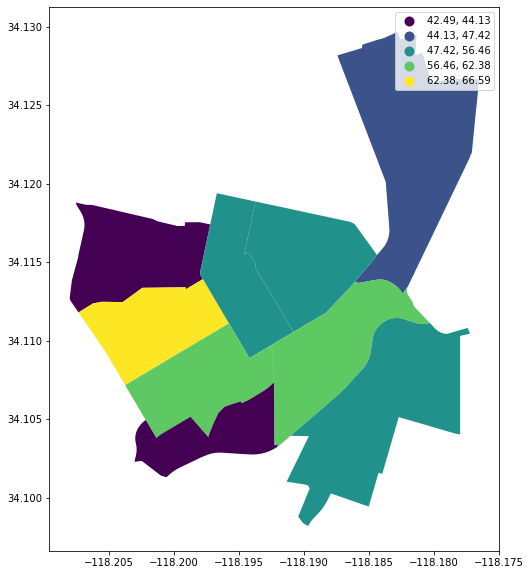

In [45]:
yoe.plot(figsize=(10,10),
                 column='Percent Mexico',
                 legend=True, 
                 scheme='NaturalBreaks')

Note that the census tract in our southeast quadrant is now less dark. This means that though there is a relatively small number of foreign born Mexican residents as illustrated on our last map, there is still a relatively larger proprotion of foreign born Mexican residents here compared to the proportion of Mexican foreign born residents in other census tracts. Before we move on, let's change the color scheme to this map.  

<AxesSubplot:>

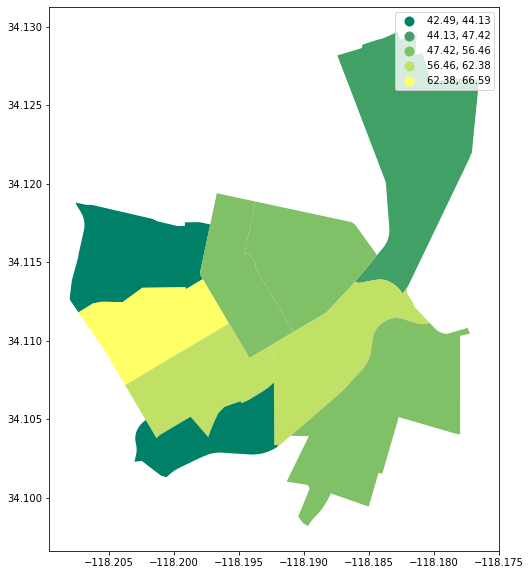

In [47]:
yoe.plot(figsize=(10,10),
                 column='Percent Mexico',
                 legend=True, 
                 scheme='NaturalBreaks',
                 cmap='summer'
        )

Let's do the same for foreign born Filipinos

<AxesSubplot:>

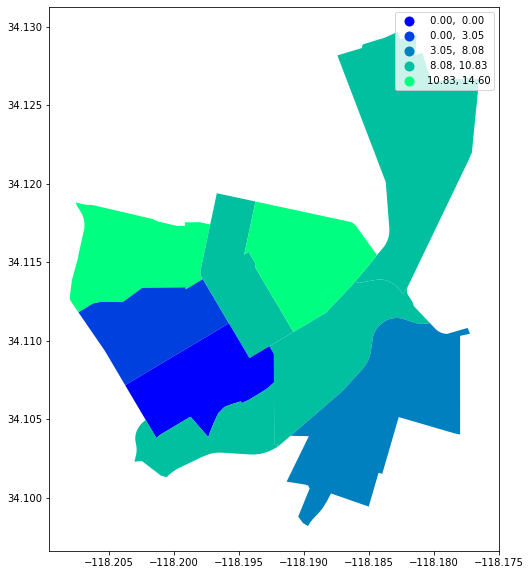

In [48]:
yoe.plot(figsize=(10,10),
                 column='Percent Philippines',
                 legend=True, 
                 scheme='NaturalBreaks',
                 cmap='winter'
        )

It looks like the highest concentration of Filipinos are found in the bright green census tracts, one of which sits at the intersection of N Figueroa St and York Boulevard. More than 10.8% of foreign born Filipinos live in this census tract. 

Let's set foreign born Filipino residents next to residents from China, Hong Kong and Taiwan to see what relationships we find.

Text(0.5, 1.0, 'Percent Foreign Born Chinese, Hong Kong, or Taiwanese')

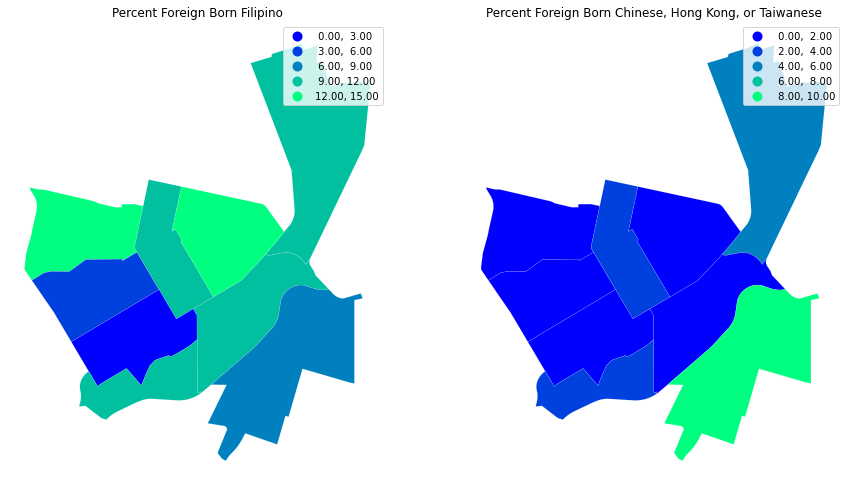

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)
ax1, ax2 = axs

yoe.plot(column='Percent Philippines', 
            cmap='winter', 
            scheme='user_defined',
            classification_kwds={'bins':[3,6,9,12,15]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Foreign Born Filipino")

yoe.plot(column='Percent China, H.K., Taiwan', 
            cmap='winter', 
            scheme='user_defined',
            classification_kwds={'bins':[2,4,6,8,10]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Foreign Born Chinese, Hong Kong, or Taiwanese")

The census tract in the southeast quadrant has the highest foreign born Chinese, Hong Kong, and Taiwanese population in the station area. Filipinos represent 9-12% of the foreign born population in this census tract. Based on the map, the foreign born population in this census tract could be as high as 22% Asian.

### Adding a Basemap to Our Maps

Lastly, let's add a base map to one of these maps for geographical context. To do so, we have to run the following code: 

In [67]:
yoe_web_mercator = yoe.to_crs(epsg=3857)

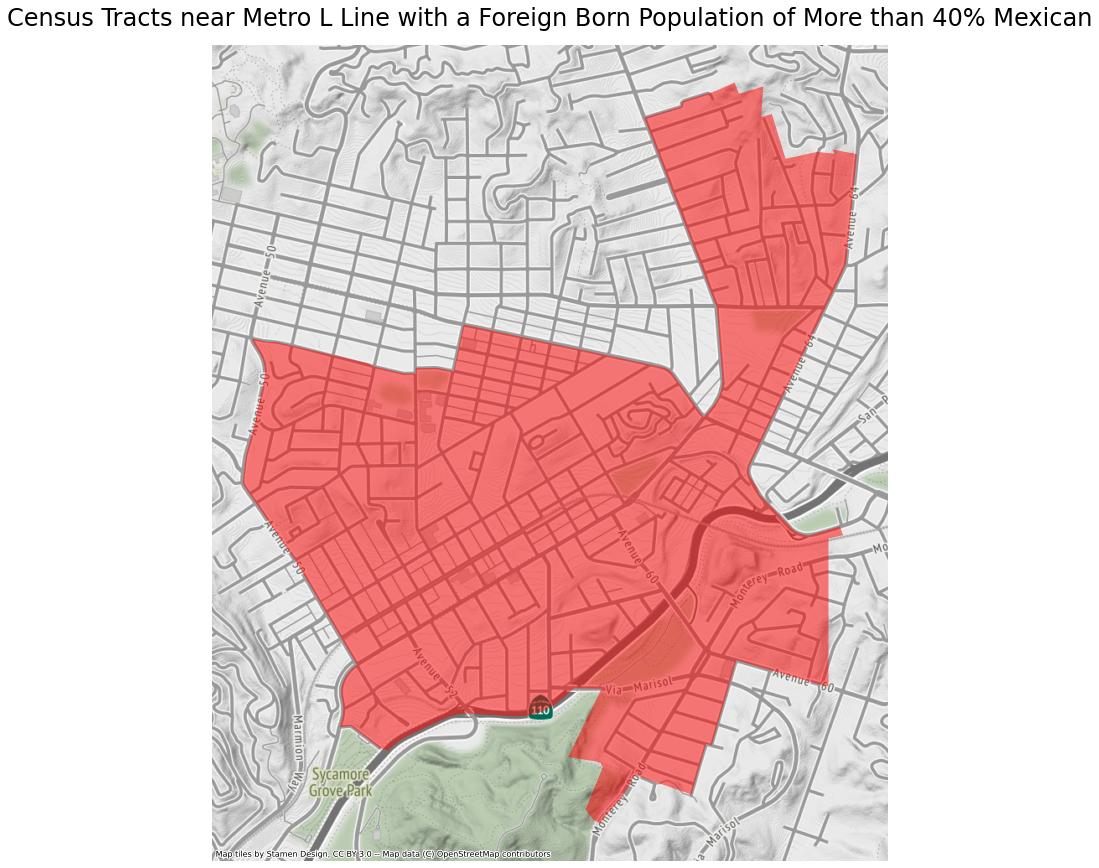

In [85]:
fig, ax = plt.subplots(figsize=(15, 15))
 
yoe_web_mercator[yoe_web_mercator['Percent Mexico'] > 40].plot(
                                                            ax=ax, 
                                                            alpha=0.5, 
                                                            color="red")

ax.axis('off')

ax.set_title('Census Tracts Near Metro L Line with a Foreign Born Population of More than 40% Mexican',fontsize=24, pad=20)

ctx.add_basemap(ax,source=ctx.providers.Stamen.Terrain)
#how can we add a legend and bins to this?

Now with our base map, we can see where the census tracts are in relation to streets and parks. 

Before we wrap up, let's do the same for the Asian households we've been analyzing. To get a better sense of where the higher clusters of Asian households are, I'm going to set a minimum percentage of the foreign born population for our census tracts. For example, if the foreign born population of a census tract is less than 7% Filipino, the census tract will not show on our map. 

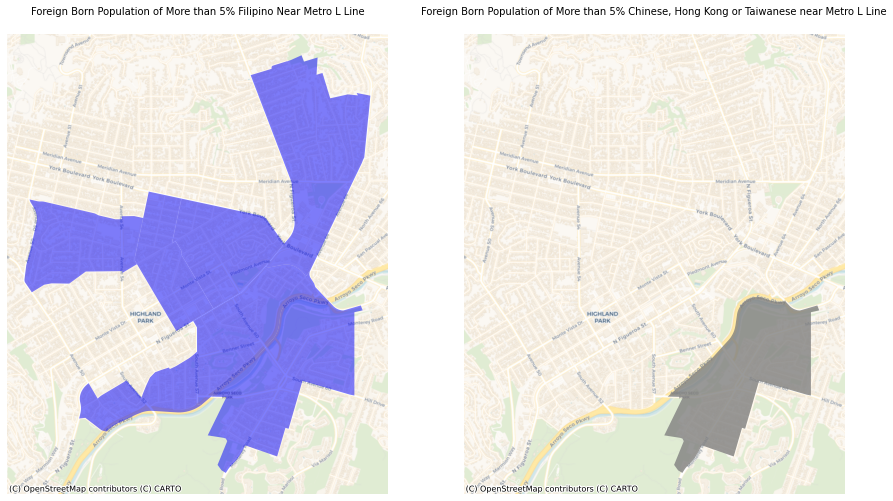

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

# name each subplot
ax1, ax2 = axs

# add the layer with ax=ax in the argument 
yoe_web_mercator[yoe_web_mercator['Percent Philippines'] > 7].plot(
                                                                    ax=ax1, 
                                                                    alpha=0.5, 
                                                                    color="blue")

ax1.axis("off")
ax1.set_title('Foreign Born Population of More than 7% Filipino Near Metro L Line',fontsize=10, pad=20)

# add a basemap
ctx.add_basemap(ax1,source=ctx.providers.CartoDB.Voyager) # default zoom

# add the layer with ax=ax in the argument 
yoe_web_mercator[yoe_web_mercator['Percent China, H.K., Taiwan'] > 7].plot(ax=ax2, 
                                                                           alpha=0.8, 
                                                                           color="grey")


ax2.axis("off")
ax2.set_title('Foreign Born Population of More than 7% Chinese, Hong Kong or Taiwanese near Metro L Line',fontsize=10, pad=20)
# add a basemap
ctx.add_basemap(ax2,source=ctx.providers.CartoDB.Voyager) # zoom override

As we had discussed, the shaded area in the southeast quadrant, which we now see is east of the 110 freeway, potentially has a disproportionately high concentration of foreign born Asian households compared to the other tracts near the Highland Park Station. Note the left map and the area around Figueroa that isn't colored in, but is colored in on our map of foreign born Mexicans. That means this area has a foreign born population of less than 7% Filipino. 